In [2]:
import numpy as np
from matplotlib import pyplot as pl
import numpy.ma as ma
import matplotlib
import gxutil
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(18,18)
from astropy import units as u
from astropy.coordinates import SkyCoord

%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
import ebf

In [4]:
data=ebf.read('/Users/TzeGoh/Desktop/Galaxia/halo02_msto_subsample.ebf')

In [5]:
data.keys()

['rad',
 'exbv_solar',
 'teff',
 'mag2',
 'mag1',
 'mag0',
 'dcmc_h',
 'dcmc_i',
 'dcmc_j',
 'satid',
 'vx',
 'vy',
 'vz',
 'mtip',
 'log',
 'pz',
 'px',
 'py',
 'feh',
 'dcmc_ks',
 'exbv_schlegel',
 'lum',
 'exbv_schlegel_inf',
 'mact',
 'glon',
 'popid',
 'glat',
 'alpha',
 'center',
 'partid',
 'age',
 'grav',
 'smass',
 'fieldid']

In [6]:
len(data['lum'])

18208538

In [7]:
sp = ebf.read('/Users/TzeGoh/Desktop/Galaxia/satprop.ebf')

In [8]:
sp.keys()

['jsat', 'log', 'msat', 'bsat', 'nsat', 'esat', 'tsat', 'nsatc', 'lsat']

In [9]:
print(data['log'])

[ '# File generated by 0.7.1\n# <parameterfile>\noutputFile                          halo02\noutputDir                           /Users/robyn/Documents/Research/ColumbiaUndergrads/Galaxia/\nphotoSys                            DCMC\nmagcolorNames                       Ks,J-Ks\nappMagLimits[0]                     -1000\nappMagLimits[1]                     24.5\nabsMagLimits[0]                     -1000\nabsMagLimits[1]                     1000\ncolorLimits[0]                      0\ncolorLimits[1]                      1\ngeometryOption                      0\nstarType                            0\nphotoError                          0\nsurveyArea                          207.455\nfSample                             0.01\npopID                               10\nwarpFlareOn                         0\nlongitude                           76.273\nlatitude                            13.4725\nseed                                17\nr_max                               1000\n# codeDataDir        

In [10]:
#gxutil.abs2app(data,corr=True,noext=True,dered=True)

In [11]:
gxutil.append_pm(data)

In [12]:
mwd = np.zeros_like(data['grav'],dtype=bool)
mwd[data['grav']<2]=True

In [13]:
d = np.sqrt(data['px']**2+data['py']**2+data['pz']**2)

In [14]:
'''Let us match the satellite...This indexes from 0 - 112'''
those_satid_numbs = []
for i in range(len(data['satid'])):
    if data['satid'][i] not in those_satid_numbs:
        those_satid_numbs.append(data['satid'][i])
        

In [15]:
'''What are those satids for the ebf file'''
print those_satid_numbs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]


In [55]:
''' Use this cell to guess the amount of objects for each satellite'''
print data['satid'][300000]


16


In [56]:
'''I am going to get satellite 16 '''

obj_in_satellite_16 = []
first_obj_pos_for_sat_16 = []
sat_16_ebf_px=[]
sat_16_ebf_py=[]
sat_16_ebf_pz=[]

for i in range(130000,300000):
    if data['satid'][i]==15:
        obj_in_satellite_16.append(data['satid'][i])
        if first_obj_pos_for_sat_16 == [] :
            first_obj_pos_for_sat_16.append(i)

start = first_obj_pos_for_sat_16[0]     
end = first_obj_pos_for_sat_16[0] + len(obj_in_satellite_3)
print start, end


for i in range(start,end):
    sat_16_ebf_px.append(data['px'][i])
    sat_16_ebf_py.append(data['py'][i])
    sat_16_ebf_pz.append(data['pz'][i])
   
x_al_16 = sat_16_ebf_px#-data['center'][0]
y_al_16 = sat_16_ebf_py#-data['center'][1]
z_al_16 = sat_16_ebf_pz#-data['center'][2]

print len(x_al_16)

132458 233883
101425


In [18]:
'''I am going to get satellite 26'''

obj_in_satellite_26 = []
first_obj_pos_for_sat_26 = []
sat_26_ebf_px=[]
sat_26_ebf_py=[]
sat_26_ebf_pz=[]

for i in range(500000,2500000):
    if data['satid'][i]==25:
        obj_in_satellite_26.append(data['satid'][i])
        if first_obj_pos_for_sat_26 == [] :
            first_obj_pos_for_sat_26.append(i)

start = first_obj_pos_for_sat_26[0]     
end = first_obj_pos_for_sat_26[0] + len(obj_in_satellite_26)
print start, end

for i in range(start,end):
    sat_26_ebf_px.append(data['px'][i])
    sat_26_ebf_py.append(data['py'][i])
    sat_26_ebf_pz.append(data['pz'][i])
   
x_al_26 = sat_26_ebf_px#-data['center'][0]
y_al_26 = sat_26_ebf_py#-data['center'][1]
z_al_26 = sat_26_ebf_pz#-data['center'][2]

print len(x_al_26)


688384 2291114
1602730


In [19]:
'''I am going to get satellite 41'''

obj_in_satellite_41 = []
first_obj_pos_for_sat_41 = []
sat_41_ebf_px=[]
sat_41_ebf_py=[]
sat_41_ebf_pz=[]

for i in range(6000000,11000000):
    if data['satid'][i]==40:
        obj_in_satellite_41.append(data['satid'][i])
        if first_obj_pos_for_sat_41 == [] :
            first_obj_pos_for_sat_41.append(i)

start = first_obj_pos_for_sat_41[0]     
end = first_obj_pos_for_sat_41[0] + len(obj_in_satellite_41)
print start, end

for i in range(start,end):
    sat_41_ebf_px.append(data['px'][i])
    sat_41_ebf_py.append(data['py'][i])
    sat_41_ebf_pz.append(data['pz'][i])
   
x_al_41 = sat_41_ebf_px#-data['center'][0]
y_al_41 = sat_41_ebf_py#-data['center'][1]
z_al_41 = sat_41_ebf_pz#-data['center'][2]

print len(x_al_41)

6763899 10248285
3484386


In [20]:
'''I am going to get satellite 55'''

obj_in_satellite_55 = []
first_obj_pos_for_sat_55 = []
sat_55_ebf_px=[]
sat_55_ebf_py=[]
sat_55_ebf_pz=[]

for i in range(10000000,13000000):
    if data['satid'][i]==40:
        obj_in_satellite_55.append(data['satid'][i])
        if first_obj_pos_for_sat_55 == [] :
            first_obj_pos_for_sat_55.append(i)

start = first_obj_pos_for_sat_55[0]     
end = first_obj_pos_for_sat_55[0] + len(obj_in_satellite_55)
print start, end

for i in range(start,end):
    sat_55_ebf_px.append(data['px'][i])
    sat_55_ebf_py.append(data['py'][i])
    sat_55_ebf_pz.append(data['pz'][i])
   
x_al_55 = sat_55_ebf_px#-data['center'][0]
y_al_55 = sat_55_ebf_py#-data['center'][1]
z_al_55 = sat_55_ebf_pz#-data['center'][2]

print len(x_al_55)

10000000 10248285
248285


In [21]:
'''Opening the DAT File'''
f = open('halo02.dat')
hel = []
for line in f:
    hel.append(line)
    

In [22]:
'''Appending the DAT File into a list ... this list indexes from 0 to 112'''
length = len(hel)
print length

flow = []
for i in range(length):
    floats = [float(x) for x in hel[i].split()]
    flow.append(floats)    

those_satid_numbs_for_DAT_file = []
for i in range(length):
    if flow[i][0] not in those_satid_numbs_for_DAT_file:
        those_satid_numbs_for_DAT_file.append(flow[i][0])

2391434


In [23]:
'''Tell me what those satid file is for the DAT file'''
print those_satid_numbs_for_DAT_file

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0]


In [24]:
'''The DAT File in x and y'''
print flow[0]
print flow[1232]

x = []
y = []
z = []
for i in range(length):
    x.append(flow[i][1])
    y.append(flow[i][2])
    z.append(flow[i][3])
print x[0]

[1.0, -81.92, 154.85, -89.646, 27.789, -12.216, 55.966, 0.0, -2325.7, -41756.0, 12.633, -1.871, 0.2815, 46.227]
[1.0, -82.093, 154.64, -89.427, 35.239, 14.649, 39.768, 0.0, -2298.7, -41783.0, 2.6889, -1.2237, -0.32652, 20.558]
-81.92


In [57]:
'''Getting Satellite No. 16'''
sat_16_dat=[]
x16 = []
y16 = []
z16 = []

for i in range(len(flow)):
    if flow[i][0] == 16.0:
        sat_16_dat.append(flow[i])
        
length = len(sat_16_dat)

for i in range(length):
    x16.append(sat_16_dat[i][1])
    y16.append(sat_16_dat[i][2])
    z16.append(sat_16_dat[i][3])
    
print len(x16)

18251


In [26]:
'''Getting Satellite No. 26`'''
sat_26_dat=[]
x26 = []
y26 = []
z26 = []

for i in range(len(flow)):
    if flow[i][0] == 26.0:
        sat_26_dat.append(flow[i])
        
length = len(sat_26_dat)

for i in range(length):
    x26.append(sat_26_dat[i][1])
    y26.append(sat_26_dat[i][2])
    z26.append(sat_26_dat[i][3])
print len(x26)

16357


In [27]:
'''Getting Satellite No. 41`'''
sat_41_dat=[]
x41 = []
y41 = []
z41 = []

for i in range(len(flow)):
    if flow[i][0] == 41.0:
        sat_41_dat.append(flow[i])
        
length = len(sat_41_dat)

for i in range(length):
    x41.append(sat_41_dat[i][1])
    y41.append(sat_41_dat[i][2])
    z41.append(sat_41_dat[i][3])
print len(x41)

10419


In [28]:
'''Getting Satellite No. 55`'''
sat_55_dat=[]
x55 = []
y55 = []
z55 = []

for i in range(len(flow)):
    if flow[i][0] == 55.0:
        sat_55_dat.append(flow[i])
        
length = len(sat_55_dat)

for i in range(length):
    x55.append(sat_55_dat[i][1])
    y55.append(sat_55_dat[i][2])
    z55.append(sat_55_dat[i][3])
print len(x55)

11398


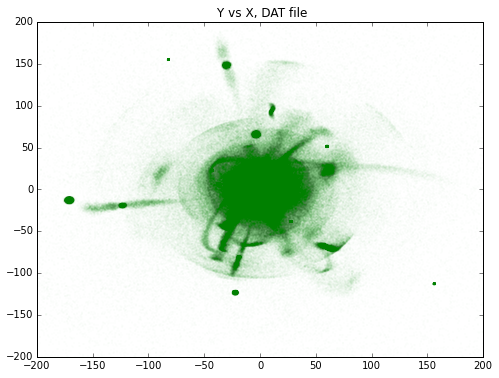

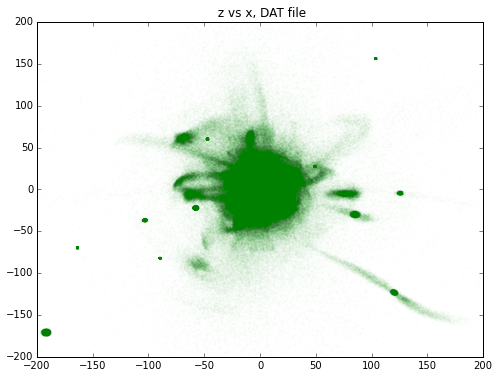

In [29]:
'''The plot for the whole DAT file in Y vs X '''
plt.rcParams['figure.figsize']=(8,6)

plt.figure(1)
pl.xlim(-200,200)
pl.ylim(-200,200)
pl.plot(x,y,'.',ms=1,alpha=0.05,color='green')
plt.title(' Y vs X, DAT file')

plt.figure(2)
pl.xlim(-200,200)
pl.ylim(-200,200)
pl.plot(z,x,'.',ms=1,alpha=0.05,color='green')
plt.title(' z vs x, DAT file')

18251
101425


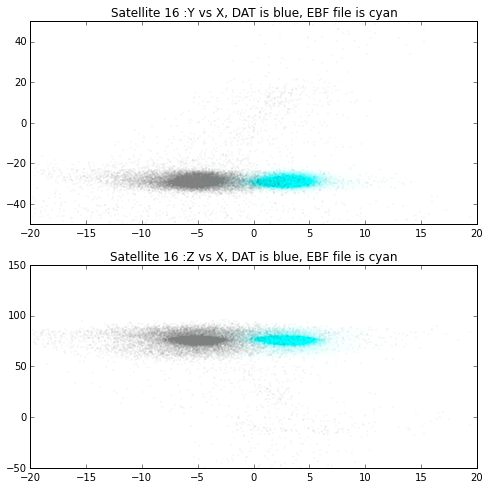

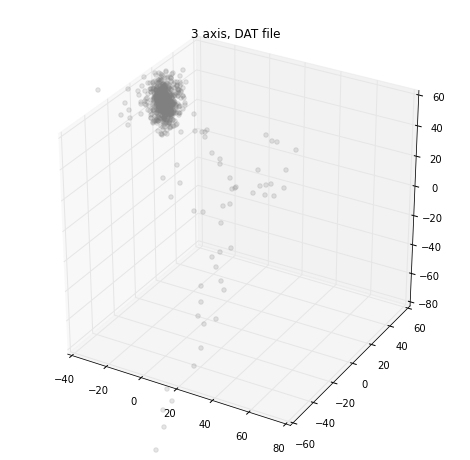

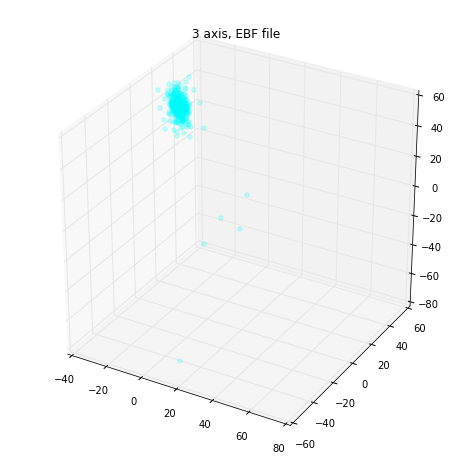

In [61]:
'''Plot me Satellite 16 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_16_dat)

print len(x16)

plt.subplot(2,1,1)
plt.plot(x16,y16,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-20,20)
plt.ylim(-50,50)

plt.subplot(2,1,2)
plt.plot(x16,z16,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-20,20)
plt.ylim(-50,150)

plt.subplot(2,1,1)
pl.plot(x_al_16,y_al_16,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 16 :Y vs X, DAT is blue, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_16,z_al_16,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 16 :Z vs X, DAT is blue, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_16_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x16[line],y16[line],z16[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        
plt.gcf().savefig('Color_coded_3d.png')


fig = plt.figure()
ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_16)

for i in range(len(x_al_16)):
    if i % 100 == 0:
        ax.scatter(x_al_16[i],y_al_16[i],z_al_16[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')   

16357
1602730


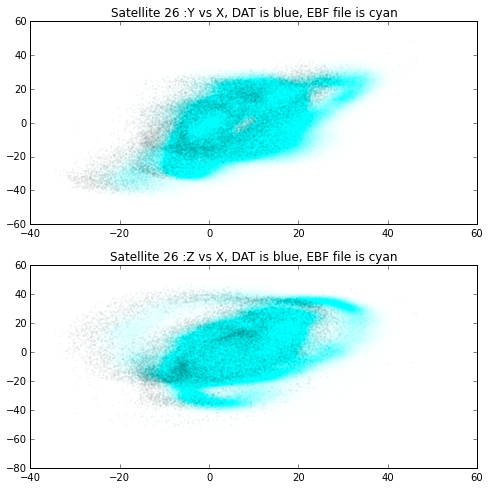

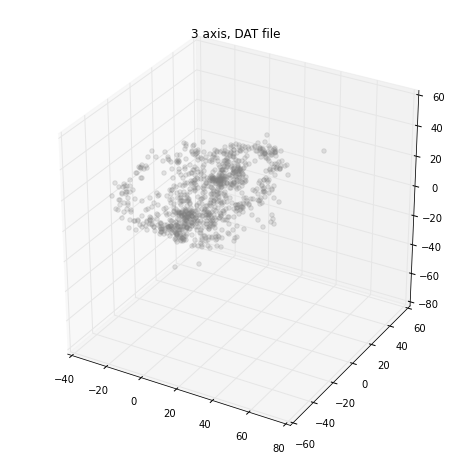

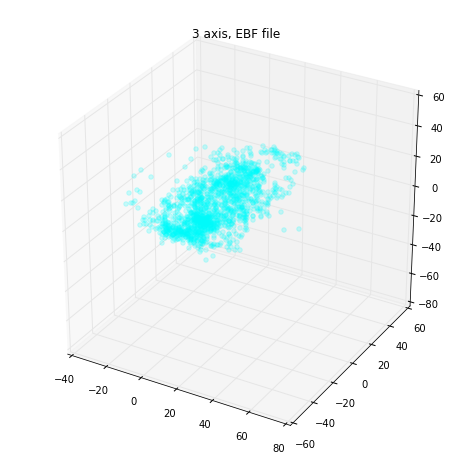

In [30]:
'''Plot me Satellite 26 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)
plt.xlim(-180,-160)
plt.ylim(-20,-5)

length = len(sat_26_dat)

print len(x26)

plt.subplot(2,1,1)
plt.plot(x26,y26,'.',ms=3,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.subplot(2,1,2)
plt.plot(x26,z26,'.',ms=3,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')


plt.subplot(2,1,1)
pl.plot(x_al_26,y_al_26,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 26 :Y vs X, DAT is blue, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_26,z_al_26,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 26 :Z vs X, DAT is blue, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_26_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x26[line],y26[line],z26[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        
plt.gcf().savefig('Color_coded_3d.png')


fig = plt.figure()
ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_26)

for i in range(len(x_al_26)):
    if i % 1000 == 0:
        ax.scatter(x_al_26[i],y_al_26[i],z_al_26[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')   

10419
3484386


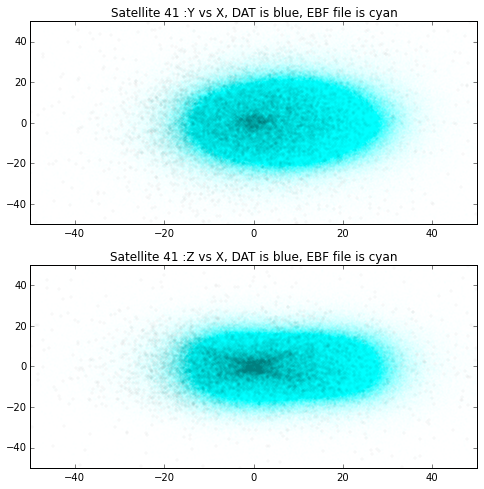

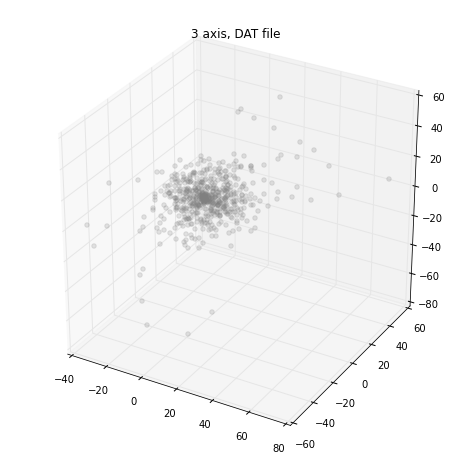

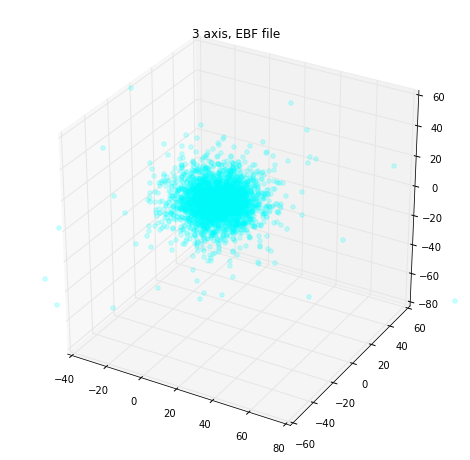

In [31]:
'''Plot me Satellite 41 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_41_dat)

print len(x41)

plt.subplot(2,1,1)
plt.plot(x41,y41,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-50,50)
plt.ylim(-50,50)

plt.subplot(2,1,2)
plt.plot(x41,z41,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-50,50)
plt.ylim(-50,50)

plt.subplot(2,1,1)
pl.plot(x_al_41,y_al_41,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 41 :Y vs X, DAT is blue, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_41,z_al_41,'.',ms=2,alpha=0.01,color='cyan')
plt.title('Satellite 41 :Z vs X, DAT is blue, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_41_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x41[line],y41[line],z41[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        
plt.gcf().savefig('Color_coded_3d.png')


fig = plt.figure()
ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_41)

for i in range(len(x_al_41)):
    if i % 1000 == 0:
        ax.scatter(x_al_41[i],y_al_41[i],z_al_41[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')   

11398
3484386


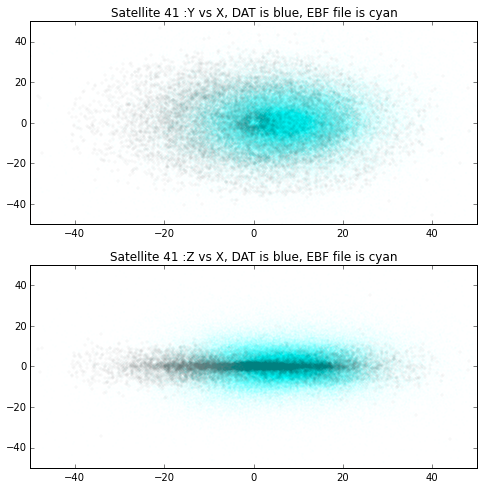

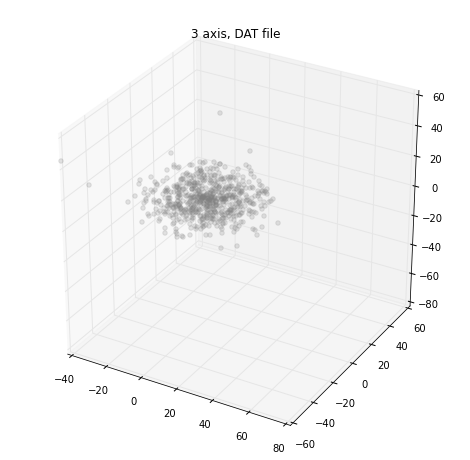

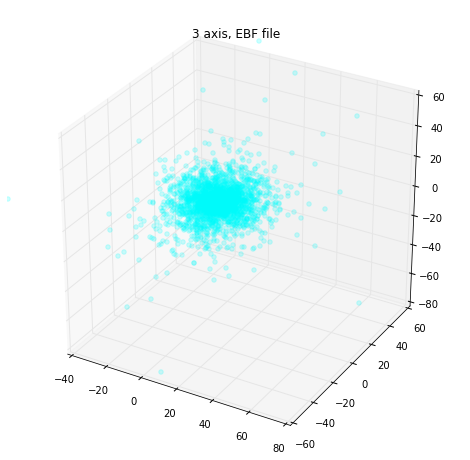

In [32]:
'''Plot me Satellite 55 in 2d, and 3d'''
plt.rcParams['figure.figsize']=(8,8)

length = len(sat_55_dat)

print len(x55)

plt.subplot(2,1,1)
plt.plot(x55,y55,'.',ms=5,alpha=0.05,color='grey')
plt.title('Y vs X, DAT file')

plt.xlim(-50,50)
plt.ylim(-50,50)

plt.subplot(2,1,2)
plt.plot(x55,z55,'.',ms=5,alpha=0.05,color='grey')
plt.title('Z vs X, DAT file')

plt.xlim(-50,50)
plt.ylim(-50,50)

plt.subplot(2,1,1)
pl.plot(x_al_55,y_al_55,'.',ms=2,alpha=0.02,color='cyan')
plt.title('Satellite 41 :Y vs X, DAT is blue, EBF file is cyan')

plt.subplot(2,1,2)
plt.plot(x_al_55,z_al_55,'.',ms=2,alpha=0.02,color='cyan')
plt.title('Satellite 41 :Z vs X, DAT is blue, EBF file is cyan')

#####################################################################
plt.rcParams['figure.figsize']=(18,8)
length = len(sat_55_dat)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection = '3d')

ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

for line in range(length):
    if line%17 == 0:              # You must input a prime number here 
        ax.scatter(x55[line],y55[line],z55[line],'.',color='grey',alpha=0.2)
plt.title('3 axis, DAT file')        
plt.gcf().savefig('Color_coded_3d.png')


fig = plt.figure()
ax=fig.add_subplot(1,2,2, projection = '3d')
ax.set_xlim(-40,80)
ax.set_ylim(-60,60)
ax.set_zlim(-80,60)

print len(x_al_41)

for i in range(len(x_al_55)):
    if i % 100 == 0:
        ax.scatter(x_al_55[i],y_al_55[i],z_al_55[i],alpha=0.2,color='cyan')
plt.title('3 axis, EBF file')   